In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#LOF
from sklearn.neighbors import LocalOutlierFactor


In [2]:
#olympicRecords = pd.read_csv('athlete_events.csv')
#regions = pd.read_csv('noc_regions.csv')
olympicRecords = pd.read_csv("https://raw.githubusercontent.com/Abzokhattab/120-years-of-Olympic-History-Analysis/main/athlete_events.csv",index_col=0)
regions = pd.read_csv("https://raw.githubusercontent.com/Abzokhattab/120-years-of-Olympic-History-Analysis/main/noc_regions.csv",index_col=0)


In [3]:
olympicRecords.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,region,notes
NOC,,
AFG,Afghanistan,NaN
AHO,Curacao,Netherlands Antilles
ALB,Albania,NaN
ALG,Algeria,NaN
AND,Andorra,NaN



# Data Exploration

Dataset exploration (count, mean, min, max, outliers, missing-values)

In [5]:
olympicRecords.shape

(271116, 14)

In [6]:
olympicRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [7]:
olympicRecords.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [8]:
print(olympicRecords.isnull().sum())

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


The following bar chart shows which columns has missing values 
as we can notice, the `Age`, `Height`,`Weight` and `Medal` columns have missing  values 

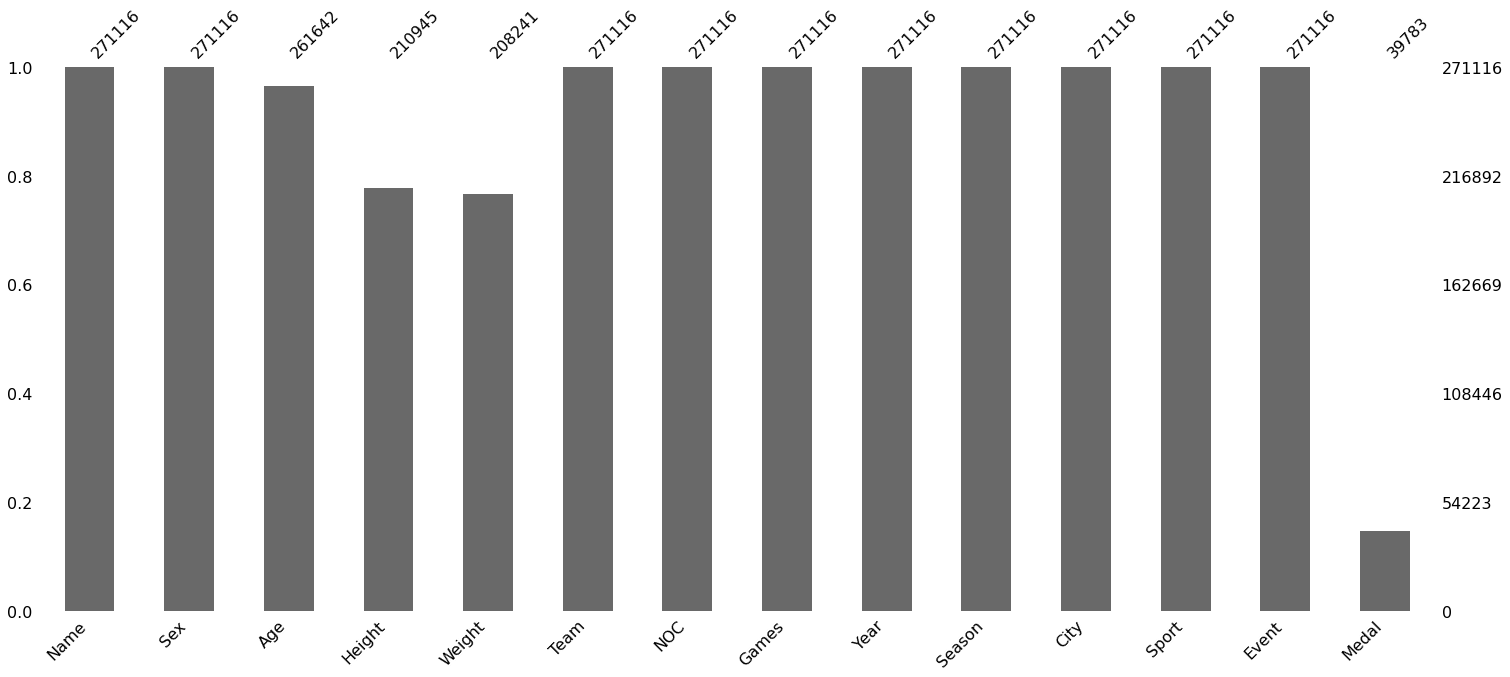

In [9]:
msno.bar(olympicRecords)


Also as shown in the bar char, the `Medal` column has a lot of missing values <br> so lets explore all columns that have missing values and plot then before and after the data cleaning process 

**`Distribution of  medals  across the dataset`**


In [10]:
print(olympicRecords.Medal.value_counts())
print(olympicRecords.Medal.unique())


Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64
[nan 'Gold' 'Bronze' 'Silver']


- Although the medal column contains NAN values, they do not appear in the graph, so we will hardcode these values later in this notebook by converting them from "NA" to "non" in the handling missing values section.
- We also notice that the counts for all three medal types are similar (balanced)

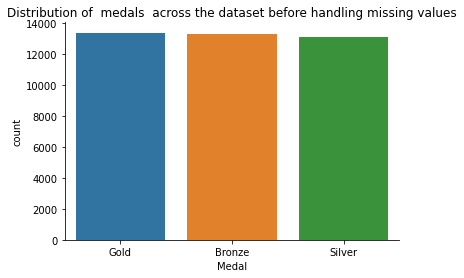

In [11]:
plt.title("Distribution of  medals  across the dataset before handling missing values")
sns.countplot(x = "Medal", data = olympicRecords )
sns.despine()

For continuous variables, we need to understand the central tendency and spread of the variable. Univariate analysis is also used to highlight missing and outlier values.  

The graphs below show the distribution of age, height, and weight across the dataset, as well as the outlier values in the dataset, as shown in the boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


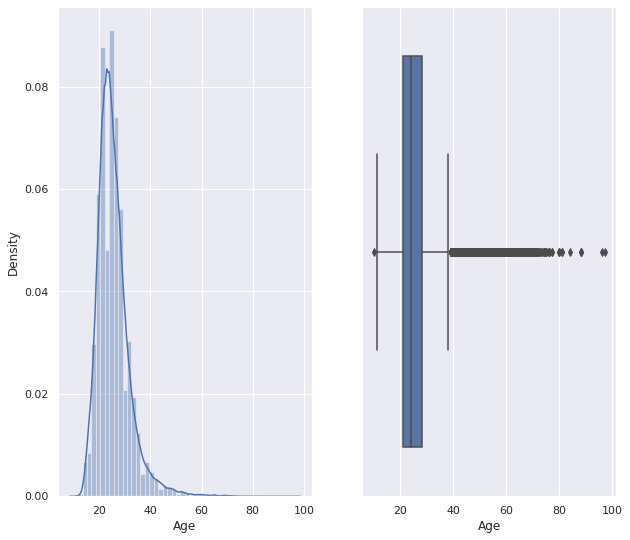

In [12]:
sns.set(rc={'figure.figsize':(10,9)})
fig, ax =plt.subplots(1,2)
sns.distplot(olympicRecords["Age"],  ax=ax[0]) 
sns.boxplot(olympicRecords["Age"],  ax=ax[1]) 
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1300x650 with 0 Axes>

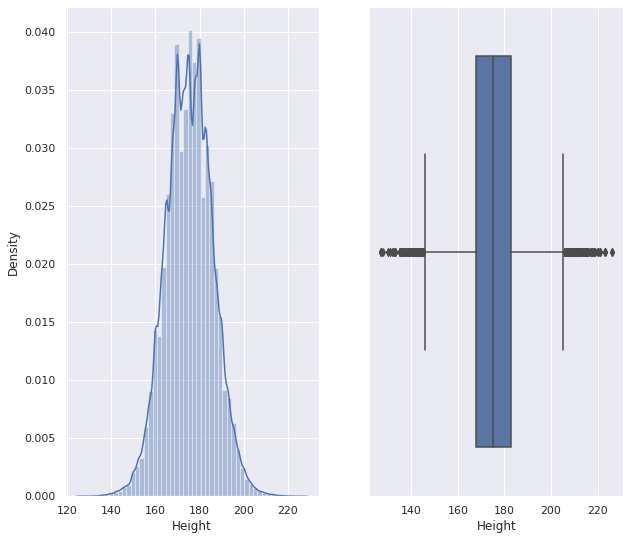

In [13]:
plt.figure(figsize=(10, 5), dpi=130)
fig, ax =plt.subplots(1,2)
sns.distplot(olympicRecords["Height"],  ax=ax[0]) 
sns.boxplot(olympicRecords["Height"],  ax=ax[1]) 
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function seaborn.rcmod.reset_orig>

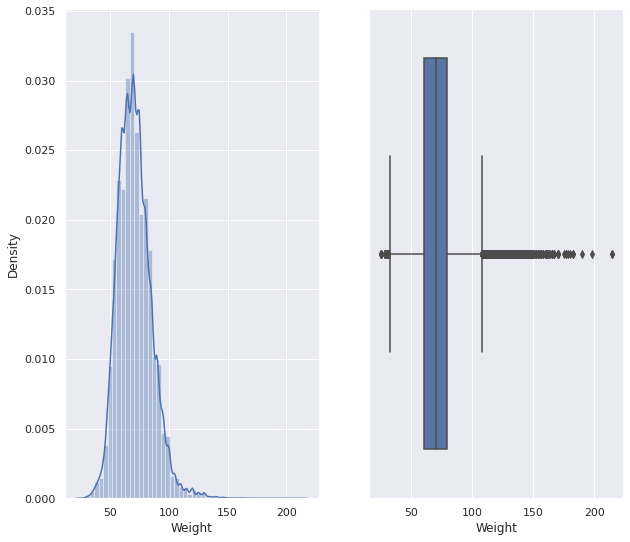

<Figure size 1300x650 with 0 Axes>

In [16]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(10, 5), dpi=130)
sns.distplot(olympicRecords["Weight"],  ax=ax[0]) 
sns.boxplot(olympicRecords["Weight"],  ax=ax[1]) 
fig.show()
#reset size
sns.reset_orig

We know that the height, age, and weight have outliers and missing values, so let's see if there is any relationship between vars before we deal with them.



 Visualize the correlation 

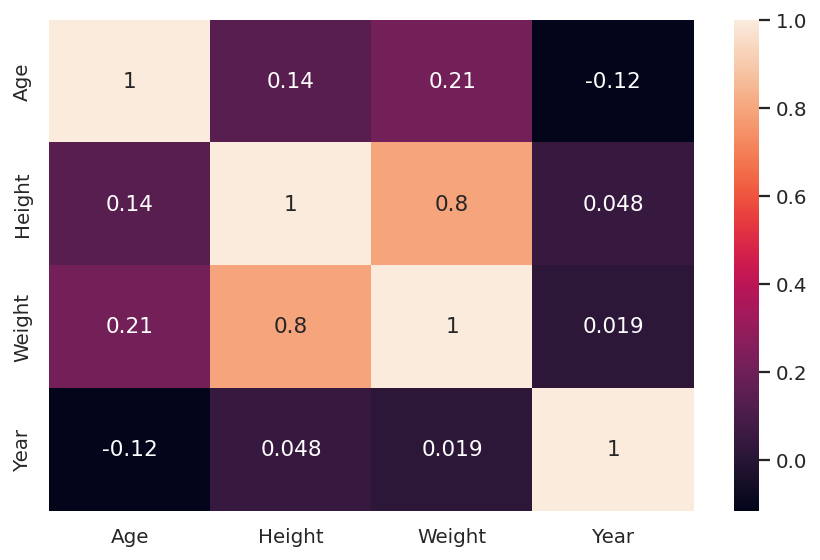

In [17]:
fig = plt.figure(figsize=(8, 5), dpi=130)
sns.heatmap(olympicRecords.corr(),annot =True)

the previous heatmap chart show a strong relationship between the height and the weight which means we can predict height's missing values depending on the weight value 

#Cleaning the Data

The notes column will be removed, because the notes column is irrelevant to our analysis.

In [18]:
regions.drop('notes', axis = 1, inplace = True)
regions.rename(columns = {'region':'Country'}, inplace = True)

In [19]:
regions.head()

,Country
NOC,
AFG,Afghanistan
AHO,Curacao
ALB,Albania
ALG,Algeria
AND,Andorra


### Handling missing values 



**We  start by handling the missing values from the medal, weight, height and age attributes **

By the above values, We can find that Age, Height, Weight and Medals have lot of missing values. The medal column have 231333 missing values. This is fine because not all the participants win a medal. So we will replace this values with `non`

In [20]:
olympicRecords['Medal'].fillna('non', inplace = True)

In [21]:
print(olympicRecords.isnull().sum())

Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


**here we checked if every NOC value is mapped to only a single team as it should be**

In [22]:
print(olympicRecords.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


**we found that this is not the case and will try next to make every Noc value mapped to only one team by merging this data set with the regions dataset with NOC as the primary key**

In [23]:
olympics_merge = olympicRecords.merge(regions,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [24]:
print(olympicRecords.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


In [25]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


**after checking we found some countries without NOC so will put it manually**

In [26]:
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [27]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team


In [28]:
print(olympics_merge.loc[:, ['NOC', 'Country']].drop_duplicates()['NOC'].value_counts().head())

SAA    1
PNG    1
TGA    1
GEQ    1
VAN    1
Name: NOC, dtype: int64


In [29]:
olympics_merge.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands


now dropping the old team attribute and replace it with the new one

In [30]:
olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [31]:
print(olympics_merge.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

SAA    1
PNG    1
TGA    1
GEQ    1
VAN    1
Name: NOC, dtype: int64


In [32]:
olympics_merge.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands


Now we will add a new column that represents the hosting country as we think it will be very important for answering our upcoming questions in the next milestones 

In [33]:
olympics_merge[['Year','City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Athina
3,1900,Paris
711,1904,St. Louis
268,1906,Athina
1149,1908,London
35,1912,Stockholm
2,1920,Antwerpen
672,1924,Chamonix
39,1924,Paris
133,1928,Amsterdam


since we only have the hosting cities we will add the hosting countries manually

In [34]:
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil'}

In [35]:
olympics_merge['Host_Country']=olympics_merge['City'].map(country_dict)
olympics_merge.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,NaN


In [36]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country    48564
dtype: int64


we missed some cities so wi add them one by one 

In [37]:
olympics_merge.loc[olympics_merge['Host_Country'].isnull(),['City']].drop_duplicates()

,City
4,Calgary
6,Albertville
8,Lillehammer
28,Salt Lake City
30,Lake Placid
40,Sochi
68,Nagano
77,Torino
83,Squaw Valley
85,Innsbruck


In [38]:
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil',
               'Calgary':'Canada',
               'Albertville':'France',
               'Oslo':'Norway',
               'Lillehammer':'Norway',
               'Salt Lake City':'USA',
               'Lake Placid':'USA',
               'Sochi':'Russia',
               'Nagano':'Japan',
               'Torino':'Italy',
               'Squaw Valley':'USA',
               'Innsbruck':'Austria',
               'Sarajevo':'Bosnia and Herzegovina',
               "Cortina d'Ampezzo":'Italy',
               'Vancouver':'Canada',
               'Grenoble':'France',
               'Sapporo':'Japan',
               'Chamonix':'France',
               'Sankt Moritz':'Switzerland',
               'Garmisch-Partenkirchen':'Germany'}

In [39]:
olympics_merge['Host_Country']=olympics_merge['City'].map(country_dict)
olympics_merge.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada


In [40]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country        0
dtype: int64


Imputing the missing values of Age, Height and Weight with the respective means for males and females as it is not realistic for males and females to have the same mean for height and weight for example 

In [41]:
olympics_merge.groupby(["Sex"])["Height"].mean()

Sex
F    167.839740
M    178.858463
Name: Height, dtype: float64

In [42]:
olympics_merge['Height'] = olympics_merge['Height'].fillna(olympics_merge['Sex'].map({'M':178.858463, 'F': 167.839740}))

In [43]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age              9474
Height              0
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country        0
dtype: int64


In [44]:
olympics_merge.groupby(["Sex"])["Age"].mean()

Sex
F    23.732881
M    26.277562
Name: Age, dtype: float64

In [45]:
olympics_merge['Age'] = olympics_merge['Age'].fillna(olympics_merge['Sex'].map({'M': 26.277562, 'F': 23.732881}))

In [46]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age                 0
Height              0
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country        0
dtype: int64


In [47]:
olympics_merge.groupby(["Sex"])["Weight"].mean()

Sex
F    60.021252
M    75.743677
Name: Weight, dtype: float64

In [48]:
olympics_merge['Weight'] = olympics_merge['Weight'].fillna(olympics_merge['Sex'].map({'M': 75.743677, 'F': 60.021252}))

In [49]:
print(olympics_merge.isnull().sum())

Name            0
Sex             0
Age             0
Height          0
Weight          0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal           0
Team            0
Host_Country    0
dtype: int64


In [50]:
olympics_merge.head(20)

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Canada
6,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,France
7,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,France
8,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Norway
9,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Norway


### Handling outliers



####Height & Weight

Now that our data is clean and have no missing values we next have to handle the outliers

So when we think that we cant just drop the outliers from the height and the weight directly
we think we should treat this case as a multivariate outlier and consider only the unrealistic weight values with respect to their height

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


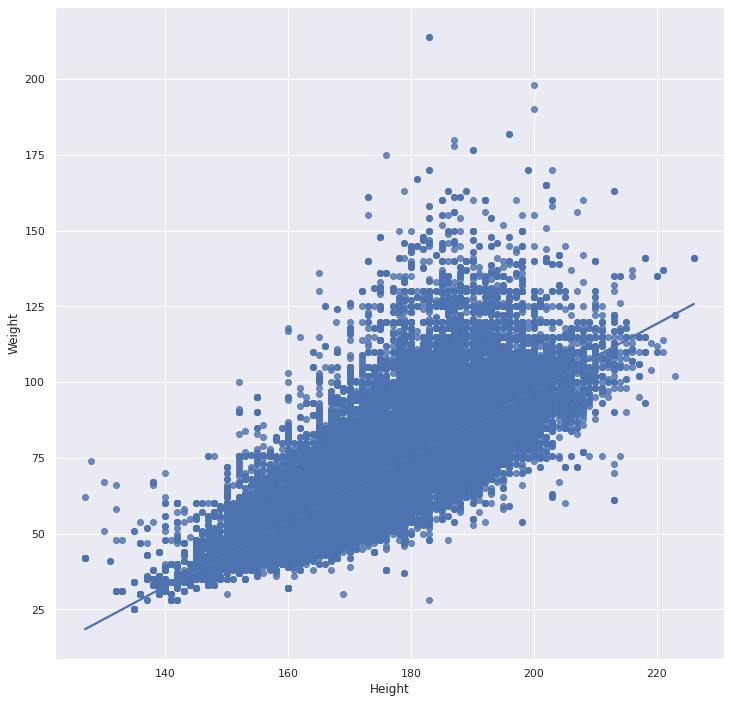

In [51]:
plt.figure(figsize=(12,12))
sns.regplot(olympics_merge['Height'],olympics_merge['Weight'])

In [52]:
clf = LocalOutlierFactor()

In [53]:
X = olympics_merge[['Height','Weight']].values
y_pred = clf.fit_predict(X)

Now we plot the height and weight after predicting the outliers usin Local outlier factor and the red dots presents the outliers detected 

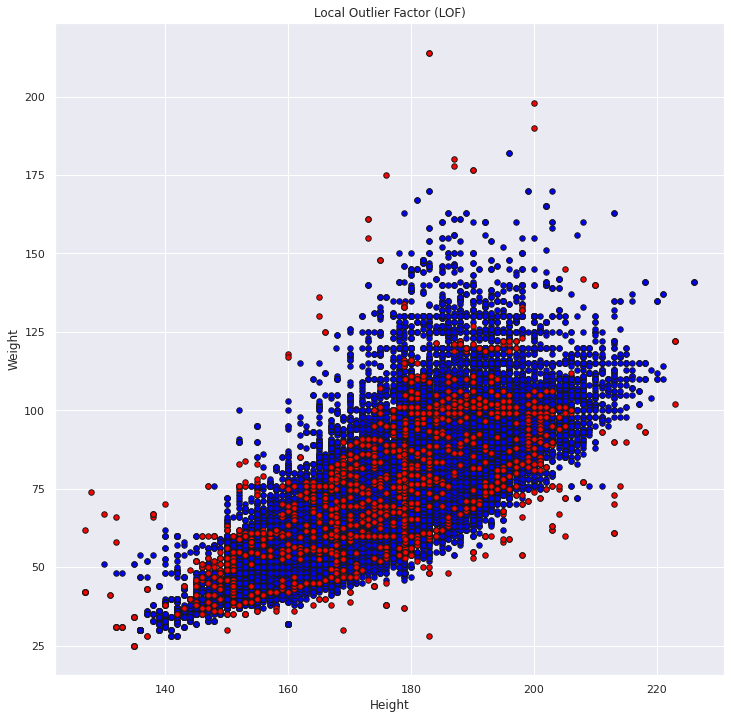

In [54]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Height');
plt.ylabel('Weight');
plt.show()

As we see the LOF was able to detect real outliers even within the normal range which would not possible to detect if we  treated the height and weight seperatly 

In [55]:
len(y_pred)

271116

In [56]:
len(X[in_mask])

265534

In [57]:
len(X[out_mask])

5582

In [58]:
olympics_merge['outlier']= y_pred

In [59]:
olympics_merge.head(10)

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country,outlier
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain,1
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK,1
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium,1
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France,1
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada,1
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Canada,1
6,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,France,1
7,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,France,1
8,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Norway,1
9,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Norway,1


Dropping outliers for values greater than `0`

In [60]:
olympics_merge_outliersDropped = olympics_merge.loc[(olympics_merge["outlier"] > 0)]

In [61]:
olympics_merge_outliersDropped.drop(columns= "outlier",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,




```
# This is formatted as code
```

now we plot the height and weight after removing the outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


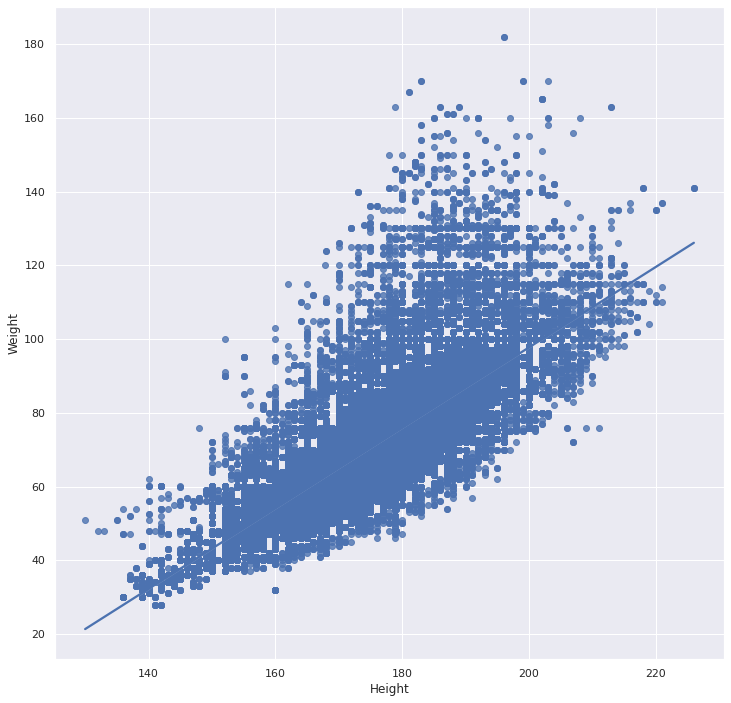

In [62]:
plt.figure(figsize=(12,12))
sns.regplot(olympics_merge_outliersDropped['Height'],olympics_merge_outliersDropped['Weight'])

we see that now we have less outliers than before the LOF 

In [63]:
olympics_merge_outliersDropped.shape

(265534, 15)

####Age

The age values range from `[10 to 97]` as shown in the boxplot figure of the outlier in the visualtization before cleaning section. So, because all of these values are real, we can't get rid of any of them, so we've decided to keep all age outliers.

# Visualisations

Age distribution between males and females 



In [64]:
gender_counts = olympics_merge_outliersDropped.Sex.value_counts()
gender_counts

M    192881
F     72653
Name: Sex, dtype: int64

The graph shows that men make up the vast majority of the people in the dataset. This is useful information that will help with the research questions.

([<matplotlib.patches.Wedge at 0x7fade83722d0>,
 [Text(0.2051771906049158, -1.0806952949168764, 'M'),
  Text(-0.2051772917869115, 1.0806952757067965, 'F')],
 [Text(0.11191483123904497, -0.5894701608637507, '72.6%'),
  Text(-0.11191488642922444, 0.5894701503855252, '27.4%')])

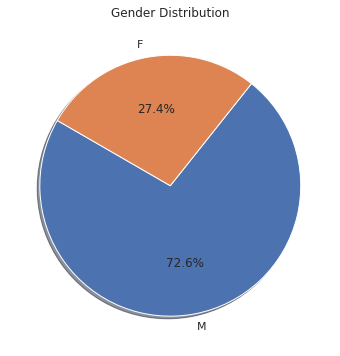

In [65]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=150, shadow=True)

The medal distribution graph shows that the majority of participants did not win any medals, which is a true fact.

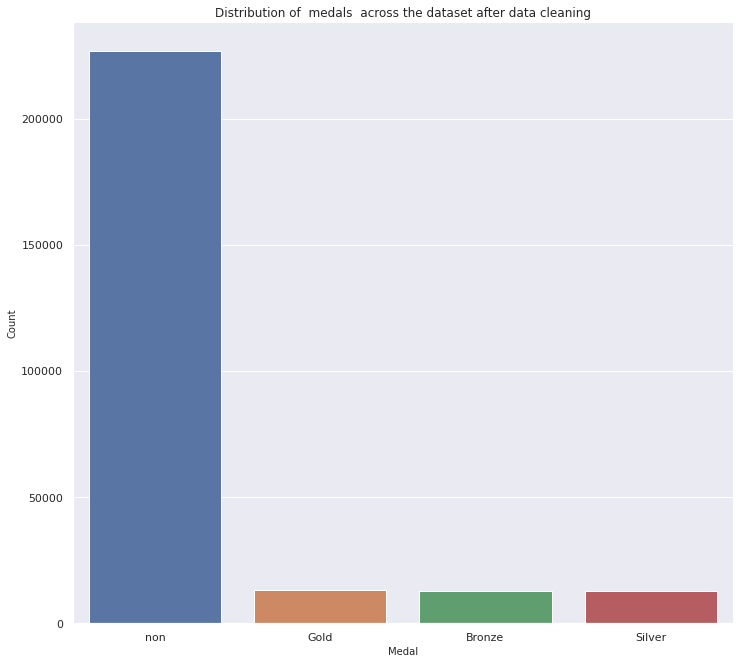

In [66]:
fig, axes = plt.subplots(1)
plt.tight_layout(pad = 1)
plt.title("Distribution of  medals  across the dataset after data cleaning")
sns.countplot(x = "Medal", data = olympics_merge_outliersDropped)
axes.set_xlabel("Medal", fontsize = 10)
axes.set_ylabel("Count", fontsize = 10)
sns.despine()


In [67]:
olympics_merge_outliersDropped.Medal.unique()

array(['non', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [68]:
olympics_merge_outliersDropped = olympics_merge_outliersDropped.replace({'Medal':{'Gold': 1,'Silver': 1,'Bronze':1, 'non': 0}})

In [69]:
olympics_merge_outliersDropped.Medal.unique()

array([0, 1])

In [70]:
summer_olympics = olympics_merge_outliersDropped[olympics_merge_outliersDropped.Season == 'Summer']
winter_olympics = olympics_merge_outliersDropped[olympics_merge_outliersDropped.Season == 'Winter']

In [71]:
summer_medal_count = summer_olympics[['Host_Country','Medal']].groupby('Host_Country', as_index = False).sum()
summer_medal_count = summer_medal_count[summer_medal_count.Medal>0].sort_values(by = ['Medal'], ascending = False).head(10)
winter_medal_count = winter_olympics[['Host_Country','Medal']].groupby('Host_Country', as_index = False).sum()
winter_medal_count = winter_medal_count[winter_medal_count.Medal>0].sort_values(by = 'Medal', ascending = False).head(10)

print('-'*5,'SUMMER OLYMPICS', '-'*5)
print(summer_medal_count)
print()
print('-'*5,'WINTER OLYMPICS', '-'*5)
print(winter_medal_count)


----- SUMMER OLYMPICS -----
   Host_Country  Medal
18          USA   4342
17           UK   3532
0     Australia   2795
8        Greece   2538
7       Germany   2095
4         China   1976
2        Brazil   1965
15        Spain   1655
14  South Korea   1539
6        France   1428

----- WINTER OLYMPICS -----
              Host_Country  Medal
10                     USA    922
2                   Canada    757
5                    Italy    658
3                   France    639
6                    Japan    616
8                   Russia    589
7                   Norway    445
0                  Austria    387
9              Switzerland    224
1   Bosnia and Herzegovina    216


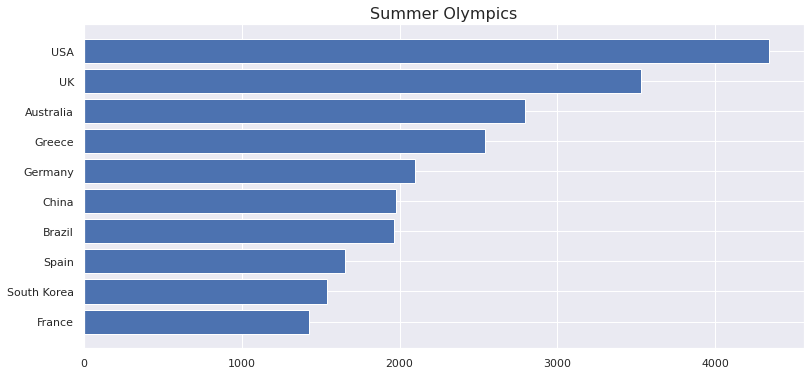

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,.5])
ax.barh(summer_medal_count.Host_Country,summer_medal_count.Medal)
ax.invert_yaxis()
plt.title('Summer Olympics', fontsize = 16)
fig.show()

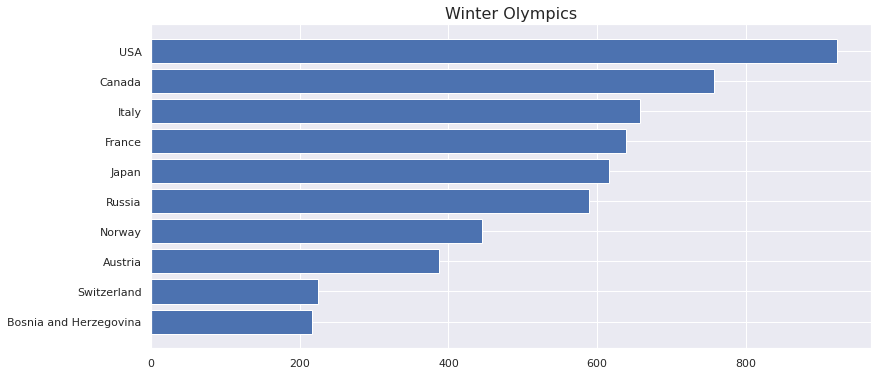

In [73]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,.5])
ax.barh(winter_medal_count.Host_Country,winter_medal_count.Medal)
ax.invert_yaxis()
plt.title('Winter Olympics', fontsize = 16)
fig.show()

Age distribution over time between men and woman  (useful for further anylsis)

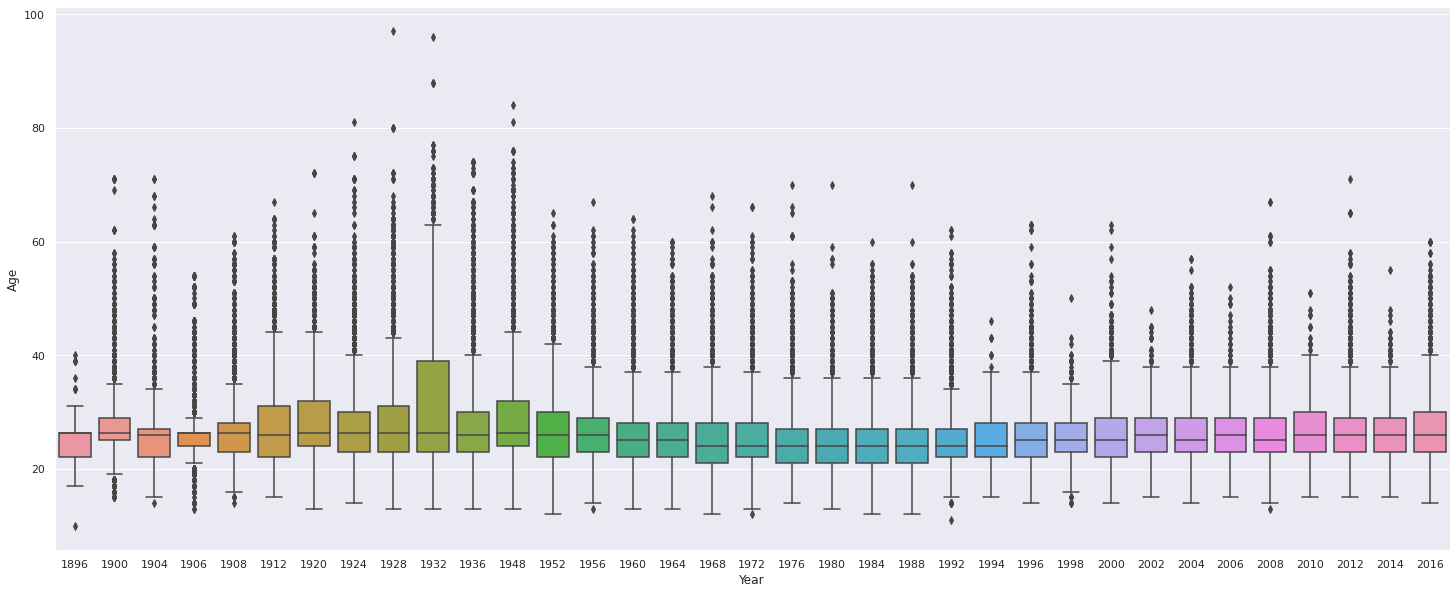

In [74]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(x="Year", y="Age", data=olympics_merge_outliersDropped[olympics_merge_outliersDropped['Sex']=='M'])



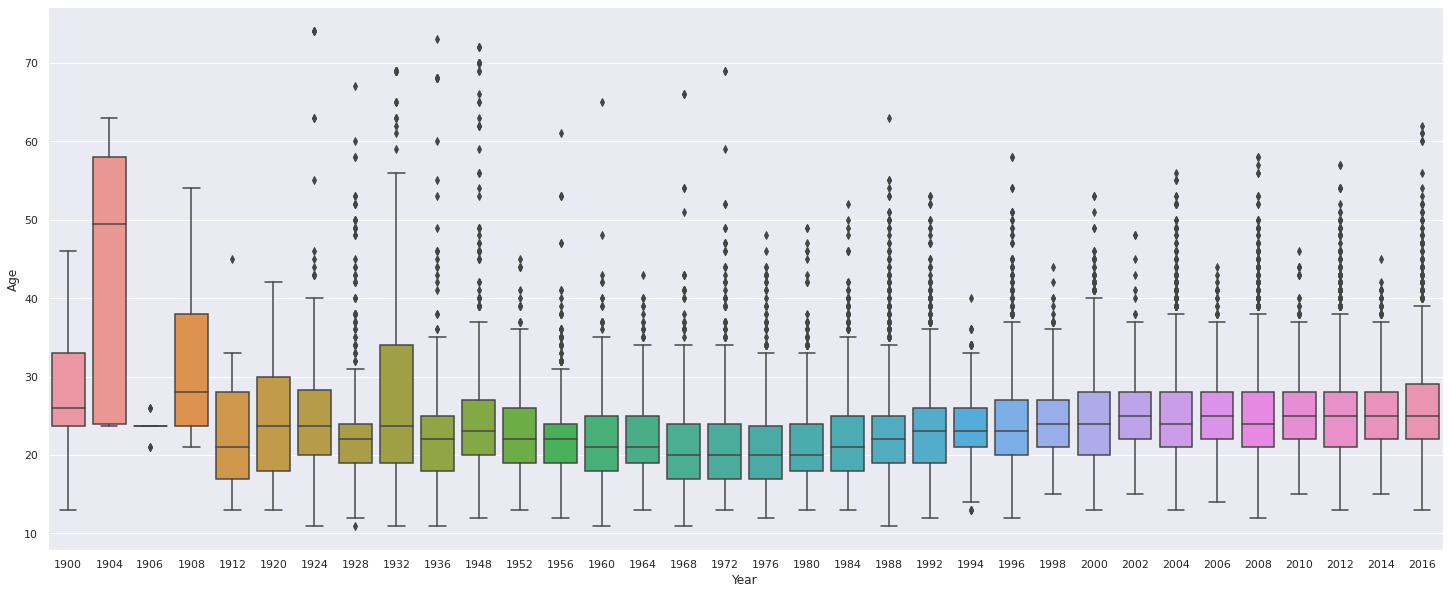

In [75]:
sns.boxplot(x="Year", y="Age", data=olympics_merge_outliersDropped[olympics_merge_outliersDropped['Sex']=='F'])
